# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
# Fetch current BTC price
btc_data = requests.get(btc_url)
btc_json_data = btc_data.json()
#print(json.dumps(btc_json_data, indent=4))
btc_price = btc_json_data['data']['1']['quotes']['USD']['price']
#print(btc_price)

# Fetch current ETH price
eth_data = requests.get(eth_url)
eth_json_data = eth_data.json()
#print(json.dumps(eth_json_data, indent=4))
eth_price = eth_json_data['data']['1027']['quotes']['USD']['price']
#print(eth_price)
# Compute current value of my crpto
my_btc_value = btc_price * my_btc
my_eth_value = eth_price * my_eth


# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $51907.20
The current value of your 5.3 ETH is $17764.59


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [24]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [25]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [28]:
# Format current date as ISO format
today = pd.Timestamp("2022-01-14", tz="America/New_York").isoformat()
start_date = pd.Timestamp("2017-01-15", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
investments_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today,
    limit=1000
).df

# Preview DataFrame
investments_data

AGG                                       SPY  \
                             open     high     low   close   volume    open   
time                                                                          
2022-01-14 00:00:00-05:00  112.53  112.545  112.15  112.17  8362916  461.19   

                                                            
                             high    low   close    volume  
time                                                        
2022-01-14 00:00:00-05:00  465.09  459.9  464.68  84363989

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(investments_data["AGG"]["close"])
spy_close_price = float(investments_data["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $112.8
Current SPY closing price: $464.54


In [10]:
# Compute the current value of shares
my_agg_value = agg_close_price * my_agg
my_spy_value = spy_close_price * my_spy

# Print current value of shares
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")

The current value of your 200 AGG shares is $22560.00
The current value of your 50 SPY shares is $23227.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
value = ['crypto', 'shares']
value_crypto = my_btc_value + my_eth_value
value_shares = my_agg_value + my_eth_value

# Create savings DataFrame
df_assets = {
    "amount": [value_crypto, value_shares]
}
df_savings = pd.DataFrame(df_assets, index=value)
# Display savings DataFrame
display(df_savings)


amount
crypto  69671.793
shares  40324.593

<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

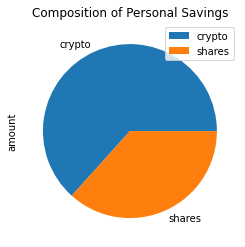

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [62]:
# Set ideal emergency fund
monthly_income = 12000
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings.sum()

#print(total_savings)

# Validate saving health
if total_savings > emergency_fund:
    print("Congratulations! You have enough money in your emergency fund")
elif total_savings == emergency_fund:
    print("Congratulations on reaching this financial goal")
elif total_savings < emergency_fund:
    print(f"You are {emergency_fund - total_savings} dollars away from reaching the emergency fund goal")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
#start_date = pd.Timestamp('2017-01-15', tz='America/New_York').isoformat()
#end_date = pd.Timestamp('2022-01-15', tz='America/New_York').isoformat()

In [31]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
df_stock_data = alpaca.get_barset(
    tickers,
    timeframe,
    start = start_date,
    end = today,
    limit=1000
).df

# Display sample data
df_stock_data.tail()

AGG                                         SPY  \
                             open     high       low   close   volume    open   
time                                                                            
2022-01-10 00:00:00-05:00  112.23  112.420  112.1427  112.41  6475269  462.70   
2022-01-11 00:00:00-05:00  112.33  112.630  112.2650  112.61  5723770  465.19   
2022-01-12 00:00:00-05:00  112.72  112.785  112.5800  112.60  6159865  471.59   
2022-01-13 00:00:00-05:00  112.60  112.800  112.5100  112.80  7925476  472.21   
2022-01-14 00:00:00-05:00  112.53  112.545  112.1500  112.17  8341976  461.19   

                                                                
                             high       low   close     volume  
time                                                            
2022-01-10 00:00:00-05:00  465.74  456.5973  465.56  106360848  
2022-01-11 00:00:00-05:00  469.85  462.0500  469.74   62346155  
2022-01-12 00:00:00-05:00  473.20  468.9400  471.06   58775301  
2022-01-13 00:00:00-05:00  472.88  463.4400  464.54   79071832  
2022-01-14 00:00:00-05:00  465.09  459.9000  464.68   84172573

In [34]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
mc_simulation_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*30
)

In [35]:
# Printing the simulation input data
mc_simulation_dist.portfolio_data.head()

AGG                                     \
                             open     high     low    close   volume   
time                                                                   
2018-01-29 00:00:00-05:00  108.14  108.210  108.02  108.190  3532887   
2018-01-30 00:00:00-05:00  108.12  108.120  107.92  108.005  2965870   
2018-01-31 00:00:00-05:00  108.20  108.210  107.88  108.090  5729791   
2018-02-01 00:00:00-05:00  107.75  107.825  107.48  107.490  8569565   
2018-02-02 00:00:00-05:00  107.25  107.345  107.10  107.200  4266243   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-01-29 00:00:00-05:00          NaN  285.97  286.43  284.50  284.68   
2018-01-30 00:00:00-05:00    -0.001710  282.59  283.29  281.22  281.66   
2018-01-31 00:00:00-05:00     0.000787  282.73  283.30  280.68  281.91   
2018-02-01 00:00:00-05:00    -0.005551  281.04  283.06  280.68  281.60   
2018-02-02 00:00:00-05:00    -0.002698  280.08  280.23  275.41  275.52   

                                                   
                              volume daily_return  
time                                               
2018-01-29 00:00:00-05:00   60825439          NaN  
2018-01-30 00:00:00-05:00   86366361    -0.010608  
2018-01-31 00:00:00-05:00   76360186     0.000888  
2018-02-01 00:00:00-05:00   64693558    -0.001100  
2018-02-02 00:00:00-05:00  121717871    -0.021591

In [36]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
mc_simulation_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/chadburford/Desktop/Repos/Financial_Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1          2          3         4          5         6    \
0     1.000000  1.000000   1.000000   1.000000  1.000000   1.000000  1.000000   
1     0.995603  1.001763   0.995943   0.997645  0.996063   1.007192  1.005283   
2     0.994301  0.988834   0.997106   0.986542  0.995471   1.008506  1.013561   
3     1.000352  0.987074   0.994069   0.995863  0.983204   0.995440  1.014997   
4     0.997953  0.990721   0.979517   0.999399  1.000819   1.003776  1.022623   
...        ...       ...        ...        ...       ...        ...       ...   
7556  9.383720  6.298062  10.811552  28.878434  5.271373  24.926865  6.924086   
7557  9.317801  6.324027  10.713015  28.916156  5.276768  24.997975  6.891657   
7558  9.334091  6.322610  10.684925  28.894445  5.286912  24.339870  6.976050   
7559  9.457125  6.262302  10.788787  28.921818  5.348665  24.044217  7.003753   
7560  9.572013  6.258980  10.693026  28.591221  5.335781  23.975111  7.038629   

            7         8          9    ...        490        491       492  \
0      1.000000  1.000000   1.000000  ...   1.000000   1.000000  1.000000   
1      1.001156  0.990396   0.999806  ...   1.018126   0.998939  0.985110   
2      0.992601  0.976134   1.012047  ...   1.020767   0.995055  0.977203   
3      1.002839  0.981688   1.010312  ...   1.017173   0.999821  0.970300   
4      0.992774  0.978135   1.009308  ...   1.014379   1.010697  0.987939   
...         ...       ...        ...  ...        ...        ...       ...   
7556  16.605754  8.549000  17.010366  ...   9.978337  10.110589  4.850159   
7557  16.435509  8.607775  17.099254  ...  10.124651   9.994735  4.823973   
7558  16.511498  8.647571  16.873094  ...   9.982827  10.051213  4.841830   
7559  16.567227  8.644533  16.914165  ...  10.019643  10.065138  4.857992   
7560  16.684050  8.703407  16.886947  ...  10.133565  10.164080  4.813143   

            493       494        495        496       497        498       499  
0      1.000000  1.000000   1.000000   1.000000  1.000000   1.000000  1.000000  
1      1.002408  1.000749   0.988680   1.001290  1.001315   1.001727  1.004027  
2      0.999942  0.993699   0.983915   0.999268  1.006048   0.999558  0.998200  
3      0.997647  0.989568   0.983608   1.004534  1.013796   0.986796  0.979553  
4      0.995433  0.990520   0.991203   1.004554  1.011811   0.973436  0.973748  
...         ...       ...        ...        ...       ...        ...       ...  
7556  21.383566  8.937578  17.926970  12.157541  9.090756  16.916493  8.145313  
7557  21.361475  8.895693  17.938323  12.178249  9.049776  16.963714  8.192083  
7558  21.223601  8.843747  18.185286  12.192570  8.897927  16.906033  8.323439  
7559  21.117774  8.877626  18.246219  12.346330  8.932357  16.958123  8.292669  
7560  21.177338  8.881277  18.168327  12.459844  8.909416  17.126228  8.232840  

[7561 rows x 500 columns]

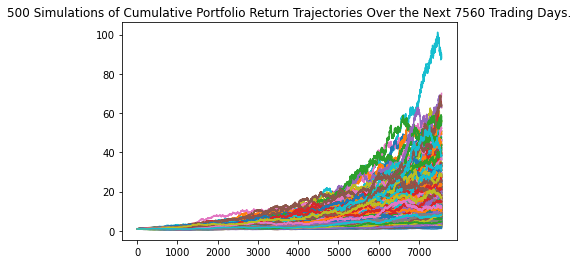

In [38]:
# Plot simulation outcomes
line_plot = mc_simulation_dist.plot_simulation()

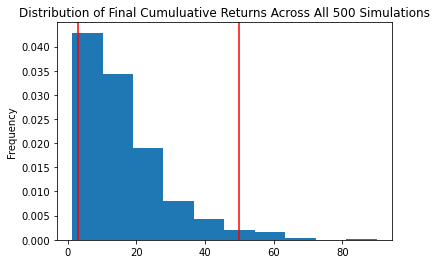

In [39]:
# Plot probability distribution and confidence intervals
dist_plot = mc_simulation_dist.plot_distribution()

### Retirement Analysis

In [40]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_stats = mc_simulation_dist.summarize_cumulative_return()

# Print summary statistics
print(summary_stats)

count           500.000000
mean             16.502343
std              12.465770
min               1.269195
25%               7.826546
50%              12.633987
75%              21.503847
max              89.937718
95% CI Lower      2.967698
95% CI Upper     50.007476
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [41]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $59353.95 and $1000149.52


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [42]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_stats[8]*initial_investment,2)
ci_upper = round(summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $89030.93 and $1500224.28


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [43]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
challenge_simulation_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*5
)
challenge_simulation_dist.portfolio_data.head()

AGG                                     \
                             open     high     low    close   volume   
time                                                                   
2018-01-29 00:00:00-05:00  108.14  108.210  108.02  108.190  3532887   
2018-01-30 00:00:00-05:00  108.12  108.120  107.92  108.005  2965870   
2018-01-31 00:00:00-05:00  108.20  108.210  107.88  108.090  5729791   
2018-02-01 00:00:00-05:00  107.75  107.825  107.48  107.490  8569565   
2018-02-02 00:00:00-05:00  107.25  107.345  107.10  107.200  4266243   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-01-29 00:00:00-05:00          NaN  285.97  286.43  284.50  284.68   
2018-01-30 00:00:00-05:00    -0.001710  282.59  283.29  281.22  281.66   
2018-01-31 00:00:00-05:00     0.000787  282.73  283.30  280.68  281.91   
2018-02-01 00:00:00-05:00    -0.005551  281.04  283.06  280.68  281.60   
2018-02-02 00:00:00-05:00    -0.002698  280.08  280.23  275.41  275.52   

                                                   
                              volume daily_return  
time                                               
2018-01-29 00:00:00-05:00   60825439          NaN  
2018-01-30 00:00:00-05:00   86366361    -0.010608  
2018-01-31 00:00:00-05:00   76360186     0.000888  
2018-02-01 00:00:00-05:00   64693558    -0.001100  
2018-02-02 00:00:00-05:00  121717871    -0.021591

In [44]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
challenge_simulation_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/chadburford/Desktop/Repos/Financial_Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.994923  0.991167  0.994634  0.991174  0.996131  0.998388  0.997235   
2     1.012933  0.991708  0.994722  1.001329  0.994696  0.995945  0.999870   
3     1.025447  0.996494  0.996444  0.990240  0.990357  0.993743  1.010484   
4     1.027876  1.009621  1.008651  0.987700  0.985512  1.003919  1.016658   
...        ...       ...       ...       ...       ...       ...       ...   
1256  1.692257  1.671502  2.604946  1.615368  1.431202  1.721219  2.186747   
1257  1.707040  1.673277  2.576924  1.600783  1.416908  1.713496  2.169747   
1258  1.722504  1.689892  2.603993  1.575838  1.403208  1.722481  2.169001   
1259  1.723179  1.673806  2.629734  1.575653  1.399744  1.744595  2.168267   
1260  1.751226  1.661027  2.639331  1.585984  1.401357  1.734479  2.155012   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     1.005906  0.994604  0.993596  ...  1.006222  0.994064  1.004774   
2     0.995327  0.992501  0.997845  ...  1.005449  0.996400  0.996788   
3     1.000003  0.991276  0.995774  ...  0.998590  0.993382  0.987288   
4     0.999545  0.997372  0.989770  ...  0.999889  0.977392  0.986166   
...        ...       ...       ...  ...       ...       ...       ...   
1256  0.989998  1.451597  1.502298  ...  1.338996  1.976025  1.589127   
1257  0.993951  1.455226  1.493389  ...  1.346242  1.967618  1.594937   
1258  0.982752  1.453360  1.479625  ...  1.367329  1.998314  1.584790   
1259  0.984220  1.434505  1.483719  ...  1.360354  1.999243  1.595414   
1260  0.966198  1.425355  1.486088  ...  1.362736  2.001984  1.594306   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     1.006785  1.005905  0.987213  1.007737  0.997973  1.002317  0.995617  
2     1.014381  0.996399  0.991687  1.011876  0.997734  1.000248  0.982827  
3     1.007328  1.011726  1.003289  1.008781  1.012461  1.017469  0.982558  
4     1.003339  1.003846  0.997963  0.993463  1.007410  1.028403  0.976804  
...        ...       ...       ...       ...       ...       ...       ...  
1256  1.764559  1.136462  2.053429  0.899380  2.611954  1.205344  1.514271  
1257  1.793528  1.138813  2.052952  0.917050  2.585279  1.202395  1.507866  
1258  1.787035  1.130885  2.045531  0.911984  2.598027  1.196397  1.517665  
1259  1.787078  1.142924  2.035415  0.911774  2.617242  1.184090  1.494017  
1260  1.802632  1.138608  2.035753  0.902685  2.668739  1.198644  1.495562  

[1261 rows x 500 columns]

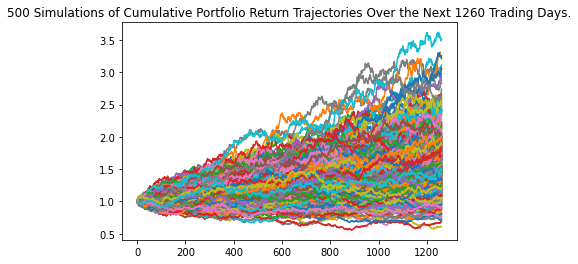

In [45]:
# Plot simulation outcomes
challenge_line_plot = challenge_simulation_dist.plot_simulation()

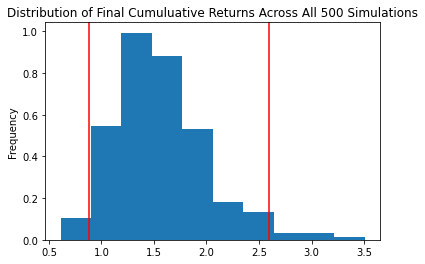

In [46]:
# Plot probability distribution and confidence intervals
challenge_dist_plot = challenge_simulation_dist.plot_distribution()

In [47]:
# Fetch summary statistics from the Monte Carlo simulation results
challenge_summary_stats = challenge_simulation_dist.summarize_cumulative_return()

# Print summary statistics
print(challenge_summary_stats)

count           500.000000
mean              1.568390
std               0.442974
min               0.610713
25%               1.254049
50%               1.507497
75%               1.803158
max               3.507745
95% CI Lower      0.886178
95% CI Upper      2.599604
Name: 1260, dtype: float64


In [56]:
# Set initial investment
challenge_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(challenge_summary_stats[8]*challenge_investment,2)
ci_upper_five = round(challenge_summary_stats[9]*challenge_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${challenge_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within in the range of $53170.65 and $155976.21


### Ten Years Retirement Option

In [49]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
ten_simulation_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.40,.60],
    num_simulation = 500,
    num_trading_days = 252*10
)
ten_simulation_dist.portfolio_data.head()

AGG                                     \
                             open     high     low    close   volume   
time                                                                   
2018-01-29 00:00:00-05:00  108.14  108.210  108.02  108.190  3532887   
2018-01-30 00:00:00-05:00  108.12  108.120  107.92  108.005  2965870   
2018-01-31 00:00:00-05:00  108.20  108.210  107.88  108.090  5729791   
2018-02-01 00:00:00-05:00  107.75  107.825  107.48  107.490  8569565   
2018-02-02 00:00:00-05:00  107.25  107.345  107.10  107.200  4266243   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-01-29 00:00:00-05:00          NaN  285.97  286.43  284.50  284.68   
2018-01-30 00:00:00-05:00    -0.001710  282.59  283.29  281.22  281.66   
2018-01-31 00:00:00-05:00     0.000787  282.73  283.30  280.68  281.91   
2018-02-01 00:00:00-05:00    -0.005551  281.04  283.06  280.68  281.60   
2018-02-02 00:00:00-05:00    -0.002698  280.08  280.23  275.41  275.52   

                                                   
                              volume daily_return  
time                                               
2018-01-29 00:00:00-05:00   60825439          NaN  
2018-01-30 00:00:00-05:00   86366361    -0.010608  
2018-01-31 00:00:00-05:00   76360186     0.000888  
2018-02-01 00:00:00-05:00   64693558    -0.001100  
2018-02-02 00:00:00-05:00  121717871    -0.021591

In [50]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
ten_simulation_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/chadburford/Desktop/Repos/Financial_Planning/Starter_Code/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

0         1         2         3         4         5         6    \
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1     0.994615  0.996471  0.993002  0.989231  1.007686  0.999814  0.992362   
2     0.997563  1.011733  0.996156  0.985561  0.996324  1.011680  1.001668   
3     0.998120  1.008505  0.999456  0.981281  0.994582  1.017983  1.001844   
4     0.981262  1.009843  1.004547  0.988156  0.995823  1.020107  1.000407   
...        ...       ...       ...       ...       ...       ...       ...   
2516  0.892350  1.657908  3.991711  1.562090  2.803755  1.514120  3.881607   
2517  0.880364  1.666869  3.992156  1.585661  2.808283  1.510372  3.863505   
2518  0.870109  1.666621  3.977860  1.588992  2.810352  1.517041  3.845190   
2519  0.866952  1.647623  3.947190  1.581430  2.823621  1.537393  3.835720   
2520  0.864322  1.661750  3.905472  1.598167  2.852024  1.549635  3.799264   

           7         8         9    ...       490       491       492  \
0     1.000000  1.000000  1.000000  ...  1.000000  1.000000  1.000000   
1     0.996004  0.996304  1.004345  ...  1.003432  0.995195  0.988578   
2     1.019863  0.988566  1.004394  ...  0.996937  0.998661  0.983521   
3     1.010635  0.972240  0.991945  ...  0.998986  1.008320  0.978077   
4     1.010160  0.970638  0.993940  ...  1.009290  1.015980  0.982604   
...        ...       ...       ...  ...       ...       ...       ...   
2516  1.810095  2.290082  1.295094  ...  1.332769  2.979400  2.463804   
2517  1.799173  2.275360  1.290566  ...  1.333716  3.004167  2.455853   
2518  1.804870  2.275066  1.263493  ...  1.313324  2.972479  2.467199   
2519  1.814656  2.257918  1.258237  ...  1.329311  3.002533  2.474561   
2520  1.809903  2.224332  1.276473  ...  1.336438  3.032653  2.439109   

           493       494       495       496       497       498       499  
0     1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000  
1     0.991465  0.999118  0.996404  0.994607  0.991465  1.014641  1.005204  
2     0.997742  1.008302  0.996842  0.987767  0.993561  1.001219  0.999850  
3     0.986030  1.001365  1.014282  1.007563  1.006419  0.995300  0.989188  
4     0.990082  1.000800  1.027182  0.997612  1.007256  0.996634  0.989794  
...        ...       ...       ...       ...       ...       ...       ...  
2516  1.880322  2.187659  1.247517  3.288070  2.353482  1.615626  1.855023  
2517  1.879478  2.184720  1.250571  3.328760  2.341336  1.615468  1.846452  
2518  1.880043  2.189526  1.260458  3.281820  2.292707  1.599724  1.838515  
2519  1.900518  2.175675  1.260428  3.278040  2.315053  1.596796  1.830395  
2520  1.917748  2.147216  1.261430  3.292752  2.278941  1.594471  1.825133  

[2521 rows x 500 columns]

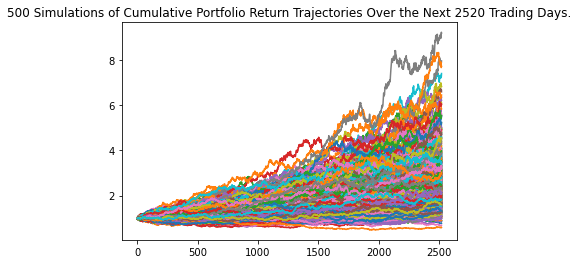

In [51]:
# Plot simulation outcomes
ten_line_plot = ten_simulation_dist.plot_simulation()

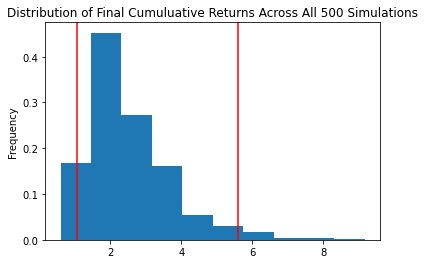

In [52]:
# Plot probability distribution and confidence intervals
ten_dist_plot = ten_simulation_dist.plot_distribution()

In [53]:
# Fetch summary statistics from the Monte Carlo simulation results
ten_summary_stats = ten_simulation_dist.summarize_cumulative_return()

# Print summary statistics
print(ten_summary_stats)

count           500.000000
mean              2.546415
std               1.207959
min               0.596033
25%               1.723348
50%               2.263106
75%               3.089405
max               9.172142
95% CI Lower      1.049090
95% CI Upper      5.589399
Name: 2520, dtype: float64


In [55]:
# Set initial investment
ten_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(ten_summary_stats[8]*ten_investment,2)
ci_upper_ten = round(ten_summary_stats[9]*ten_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${ten_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $62945.39 and $335363.96
